In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

# For multivarite analysis
import seaborn as sb

import sklearn
from sklearn import datasets

# For DB Scan analysis
from sklearn.cluster import DBSCAN
from collections import Counter

In [19]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [20]:
# Diabetes Data Set:
# Ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements were obtained for each of n = 442 diabetes patients, 
# as well as the response of interest, a quantitative measure of disease progression 
# one year after baseline. https://scikit-learn.org/stable/datasets/index.html

In [21]:
diabetes = datasets.load_diabetes()
X = diabetes.data
variable_names = diabetes.feature_names
X[0:10,]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [22]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/d

In [23]:
variable_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [24]:
# Convert dataset into Pandas DataFrame
diabetes.df = pd.DataFrame(diabetes.data)
diabetes.df.columns = variable_names
#X = diabetes.df.loc[:,2:9]
#y = diabetes.df.loc[:,:]

diabetes.df[:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Univariate Outlier Analysis - Identifying outliers from Tukey boxplots

[]

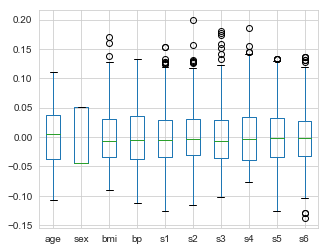

In [25]:
diabetes.df.boxplot(return_type='dict')
plt.plot()

## Multivariate Outlier Analysis

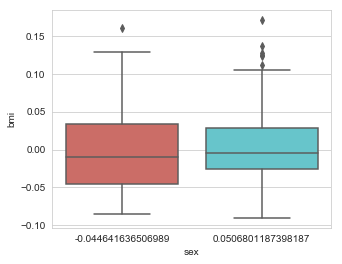

In [31]:
sb.boxplot(x='sex', y='bmi', data=diabetes.df, palette='hls')

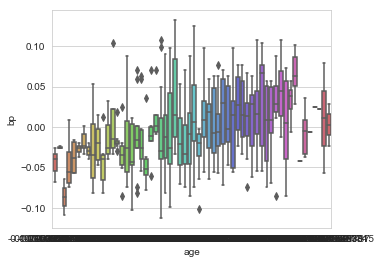

In [32]:
sb.boxplot(x='age', y='bp', data=diabetes.df, palette='hls')

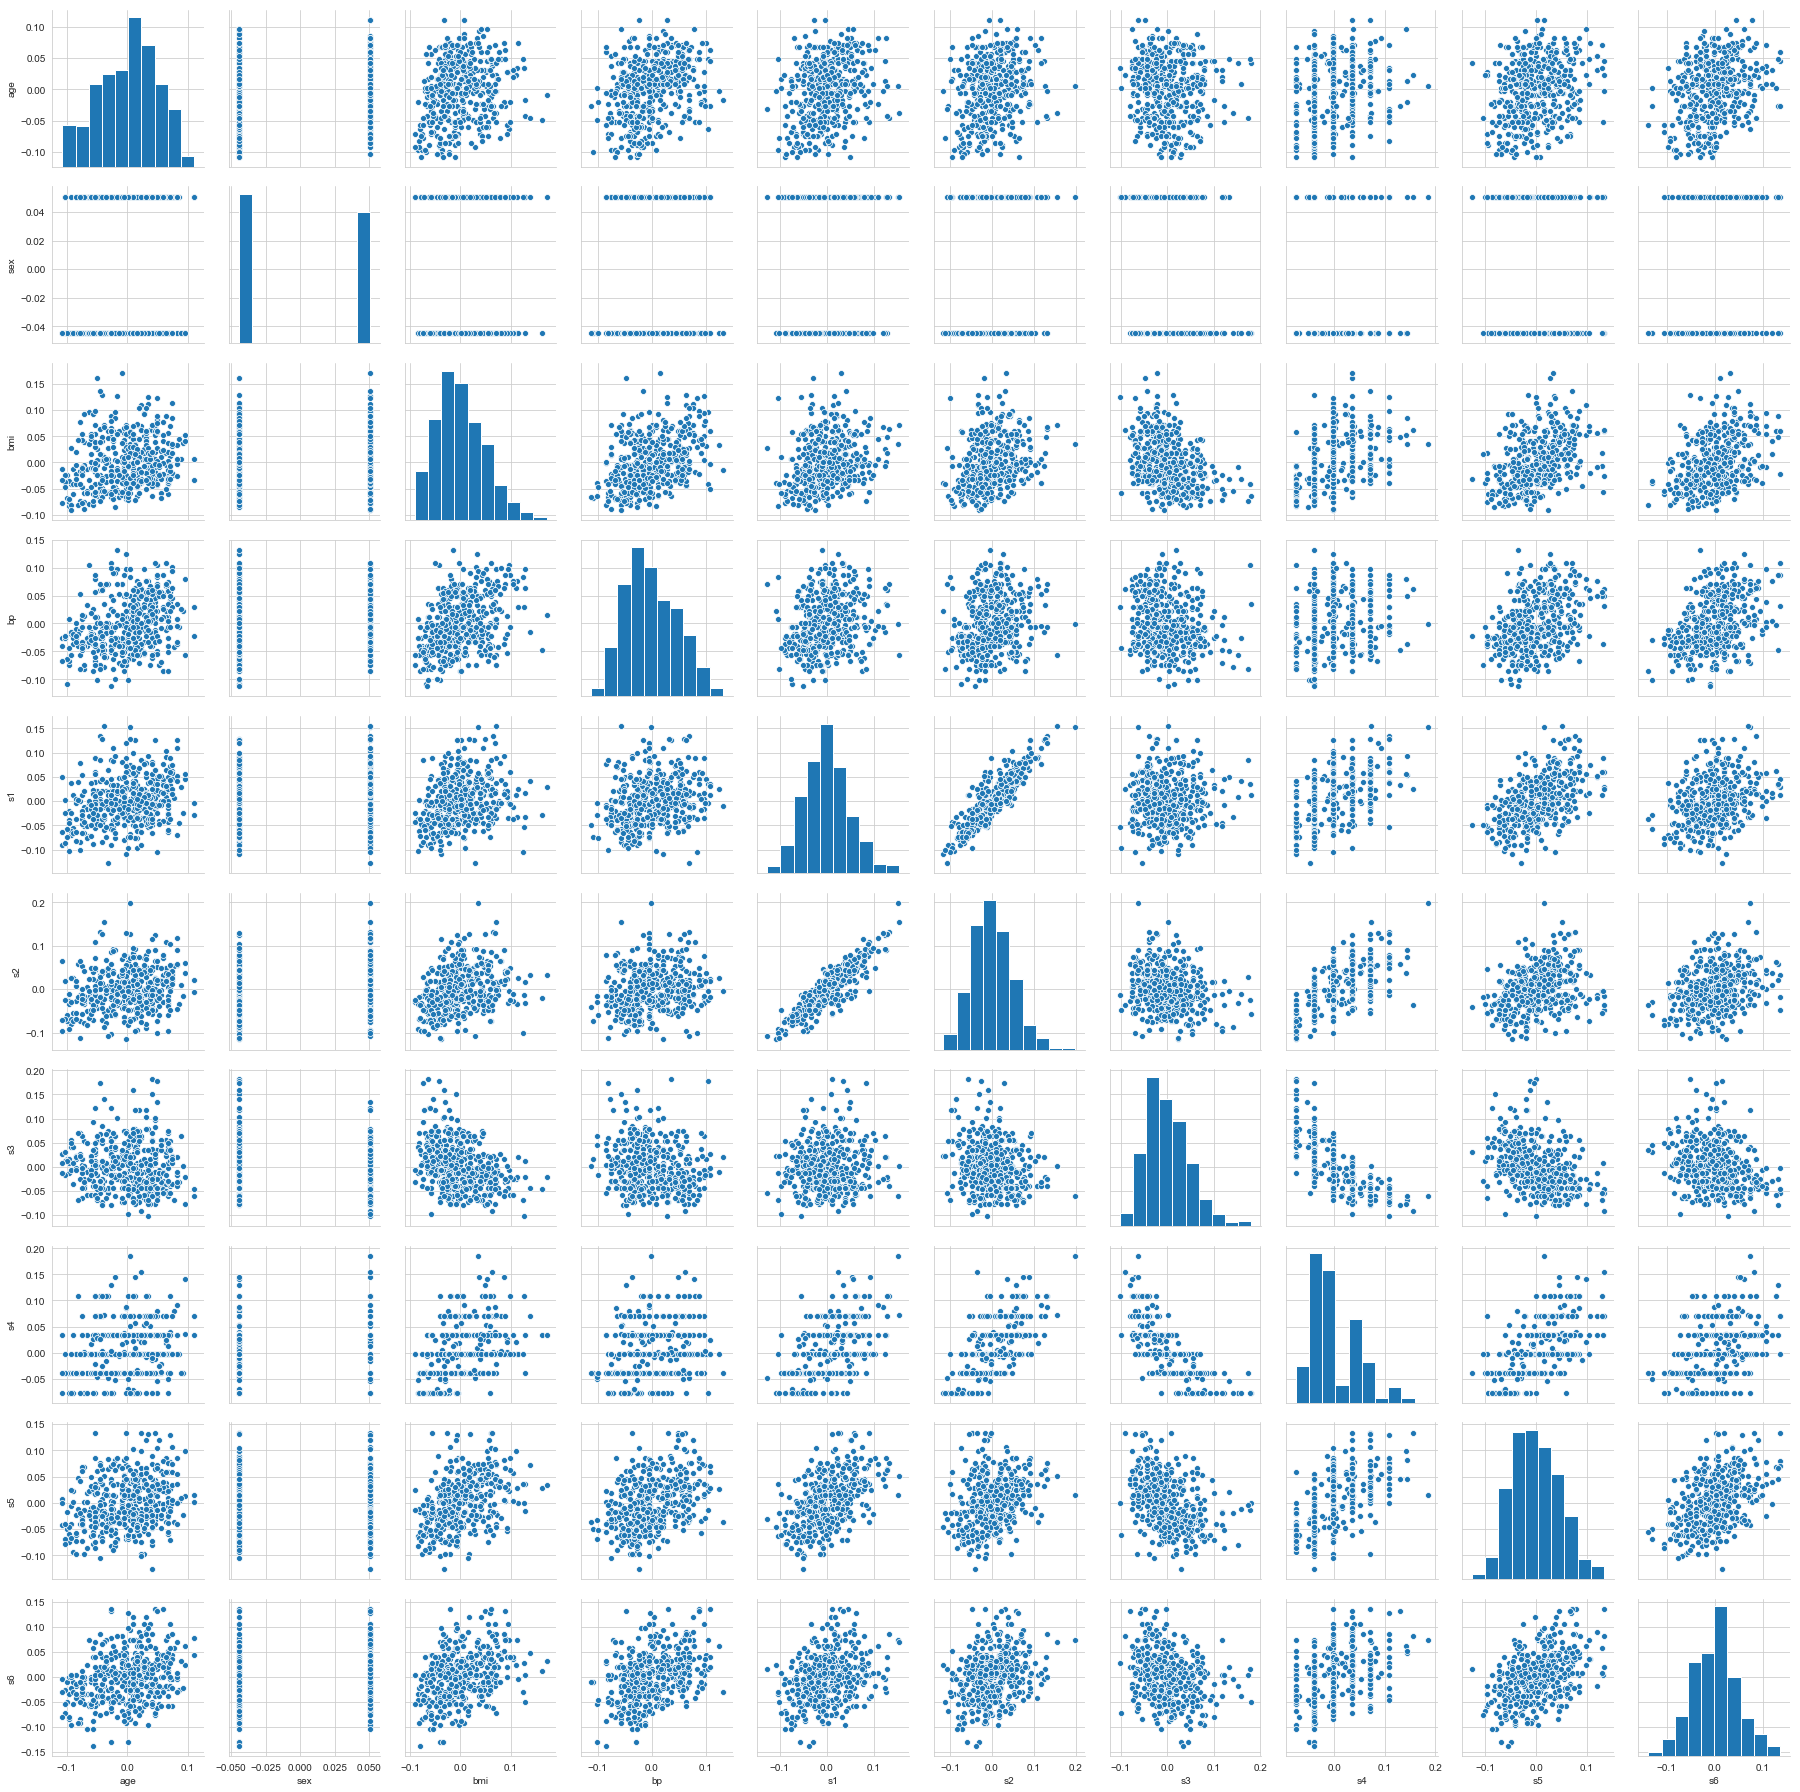

In [29]:
sb.pairplot(diabetes.df, palette='hls')

## DBSCan clustering to identify outliers

#### Train your model to identify outliers

In [64]:
model = DBSCAN(eps=0.5, min_samples=19).fit(diabetes.df)
print model

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


#### Visualize your results

In [65]:
data = diabetes.df.iloc[:,0:9].values
target = diabetes.df.iloc[:,9] # not sure how used

In [66]:
outliers_df = pd.DataFrame(data)

In [71]:
print Counter(model.labels_)

# It's returning an empty dataframe but basically because it's saying no outliers
print outliers_df[model.labels_ ==-1]

Counter({0: 442})
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Index: []


Text(0.5,1,'DBScan for Outlier Detection')

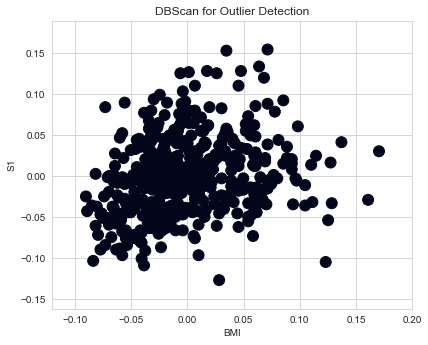

In [72]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1]) 

colors = model.labels_

ax.scatter(data[:,2], data[:,4], c=colors, s=120)
ax.set_xlabel('BMI')
ax.set_ylabel('S1')
plt.title('DBScan for Outlier Detection')

In [ ]:
# Interpreting the results:
# Counter returns how many records have been assigned a record of 1, 0 and -1 (and associated %)
# Records with label of -1 are cosnidered outliers
# It's immportant to have less than 5% of your original data size marked as outliers
# Light and dark gray areas are considered core samples - they are generated from the dense area of the dataset
# Outliers are from no core sample, they are not part of the dense area of the dataset, they are from the sparse